@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/2vPk3iACfX4

# Centralidad en Redes (Grafos)
### Librerías

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Creación de una Red Aleatoria

In [2]:
# Genera un grafo aleatorio de n vértices
n = 25

# Las tres centralidades diferentes con n = 25
grafo = nx.fast_gnp_random_graph(n=n, p=0.1, seed=14308)

# Las tres centralidades iguales con n = 7
#grafo = nx.fast_gnp_random_graph(n=n, p=0.3, seed=14308)

## Visualización de la Red

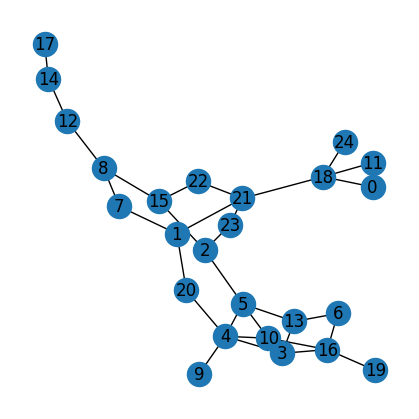

In [3]:
plt.figure(figsize=(4, 4))

# Posiciona adecuadamente los vertices -> (x, y)
posiciones = nx.spring_layout(grafo, seed=15)

# Dibuja los vértices en las posiciones adecuadas
nx.draw(grafo, posiciones, with_labels=True)
plt.show()

# Centralidad de Grado con NetworkX

In [4]:
# Calcula centralidad de grado
centralidad = nx.degree_centrality(grafo)

# Ordena los nodos en función de su centralidad
sorted(centralidad.items(), key = lambda elemento : elemento[1], reverse=True)

[(4, 0.20833333333333331),
 (5, 0.16666666666666666),
 (16, 0.16666666666666666),
 (18, 0.16666666666666666),
 (21, 0.16666666666666666),
 (1, 0.125),
 (2, 0.125),
 (3, 0.125),
 (8, 0.125),
 (10, 0.125),
 (13, 0.125),
 (15, 0.125),
 (6, 0.08333333333333333),
 (7, 0.08333333333333333),
 (12, 0.08333333333333333),
 (14, 0.08333333333333333),
 (20, 0.08333333333333333),
 (22, 0.08333333333333333),
 (23, 0.08333333333333333),
 (0, 0.041666666666666664),
 (9, 0.041666666666666664),
 (11, 0.041666666666666664),
 (17, 0.041666666666666664),
 (19, 0.041666666666666664),
 (24, 0.041666666666666664)]

# Centralidad de Grado Semi-manual

In [5]:
# Crea arreglo de numpy estructurado con los grados de los nodos
tipos = [("nodo", "int"), ("grado", "float")]
centralidad = np.array(list(grafo.degree()), dtype=tipos)

# Calcula la centralidad de grado normalizada
centralidad["grado"] = centralidad["grado"] / (n - 1)

# Ordena los nodos en función de su centralidad
centralidad.sort(order="grado")
np.flip(centralidad)

array([( 4, 0.20833333), (21, 0.16666667), (18, 0.16666667),
       (16, 0.16666667), ( 5, 0.16666667), (15, 0.125     ),
       (13, 0.125     ), (10, 0.125     ), ( 8, 0.125     ),
       ( 3, 0.125     ), ( 2, 0.125     ), ( 1, 0.125     ),
       (23, 0.08333333), (22, 0.08333333), (20, 0.08333333),
       (14, 0.08333333), (12, 0.08333333), ( 7, 0.08333333),
       ( 6, 0.08333333), (24, 0.04166667), (19, 0.04166667),
       (17, 0.04166667), (11, 0.04166667), ( 9, 0.04166667),
       ( 0, 0.04166667)], dtype=[('nodo', '<i8'), ('grado', '<f8')])

# Centralidad de Cercanía con NetworkX

In [6]:
# Calcula centralidad de cercanía
centralidad = nx.closeness_centrality(grafo)

# Ordena los nodos en función de su centralidad
sorted(centralidad.items(), key = lambda elemento : elemento[1], reverse=True)

[(2, 0.3582089552238806),
 (1, 0.34285714285714286),
 (5, 0.3380281690140845),
 (15, 0.3333333333333333),
 (20, 0.32432432432432434),
 (21, 0.32432432432432434),
 (23, 0.32),
 (4, 0.3157894736842105),
 (22, 0.3),
 (7, 0.2926829268292683),
 (8, 0.2891566265060241),
 (10, 0.2891566265060241),
 (13, 0.2727272727272727),
 (3, 0.26373626373626374),
 (18, 0.26373626373626374),
 (9, 0.24242424242424243),
 (16, 0.24242424242424243),
 (12, 0.23529411764705882),
 (6, 0.22641509433962265),
 (0, 0.21052631578947367),
 (11, 0.21052631578947367),
 (24, 0.21052631578947367),
 (19, 0.19672131147540983),
 (14, 0.1951219512195122),
 (17, 0.1643835616438356)]

# Centralidad de Cercanía Semi-manual

In [7]:
# Crea arreglo de numpy estructurado con los nodos
tipos = [("nodo", "int"), ("cercania", "float")]
centralidad = np.array(np.arange(n), dtype=tipos)
centralidad["cercania"] = np.zeros(n, dtype="float")

# Para cada nodo, calcula las rutas más cortas de él
# a todos los demás y obtiene su longitud total
for origen in range(0, n):
  total = 0
  for destino in range(0, n):
    if origen != destino:
      ruta_mas_corta = nx.shortest_path(grafo, origen, destino)
      longitud = len(ruta_mas_corta) - 1
      total += longitud
  centralidad["cercania"][origen] = total

# Calcula la centralidad de cercanía normalizada
centralidad["cercania"] = (n - 1) / centralidad["cercania"]

# Ordena los nodos en función de su centralidad
centralidad.sort(order="cercania")
np.flip(centralidad)

array([( 2, 0.35820896), ( 1, 0.34285714), ( 5, 0.33802817),
       (15, 0.33333333), (21, 0.32432432), (20, 0.32432432),
       (23, 0.32      ), ( 4, 0.31578947), (22, 0.3       ),
       ( 7, 0.29268293), (10, 0.28915663), ( 8, 0.28915663),
       (13, 0.27272727), (18, 0.26373626), ( 3, 0.26373626),
       (16, 0.24242424), ( 9, 0.24242424), (12, 0.23529412),
       ( 6, 0.22641509), (24, 0.21052632), (11, 0.21052632),
       ( 0, 0.21052632), (19, 0.19672131), (14, 0.19512195),
       (17, 0.16438356)], dtype=[('nodo', '<i8'), ('cercania', '<f8')])

# Centralidad de Intermediación con NetworkX

In [8]:
# Calcula centralidad de intermediación
centralidad = nx.betweenness_centrality(grafo)

# Ordena los nodos en función de su centralidad
sorted(centralidad.items(), key = lambda elemento : elemento[1], reverse=True)

[(21, 0.32487922705314015),
 (2, 0.30265700483091784),
 (5, 0.28828502415458934),
 (1, 0.24625603864734294),
 (8, 0.24408212560386472),
 (18, 0.2391304347826087),
 (4, 0.23297101449275362),
 (15, 0.2314009661835749),
 (20, 0.1731884057971014),
 (12, 0.15942028985507248),
 (10, 0.11183574879227055),
 (16, 0.09927536231884058),
 (23, 0.0972222222222222),
 (7, 0.08756038647342995),
 (14, 0.08333333333333333),
 (13, 0.07524154589371981),
 (22, 0.057367149758454104),
 (3, 0.05096618357487924),
 (6, 0.0036231884057971015),
 (0, 0.0),
 (9, 0.0),
 (11, 0.0),
 (17, 0.0),
 (19, 0.0),
 (24, 0.0)]

# Centralidad de Intermediación Semi-manual

In [9]:
# Crea arreglo de numpy estructurado con los nodos
tipos = [("nodo", "int"), ("intermediacion", "float")]
centralidad = np.array(np.arange(n), dtype=tipos)
centralidad["intermediacion"] = np.zeros(n, dtype="float")

# Calcula las rutas más cortas entre todos los nodos
for origen in range(0, n - 1):
  for destino in range(origen + 1, n):
    rutas_mas_cortas = list(nx.all_shortest_paths(grafo, origen, destino))
    num_rutas = len(rutas_mas_cortas)
    # Determina cuántas veces aparece como vínculo en estas rutas más cortas
    for ruta in rutas_mas_cortas:
      for intermediario in ruta[1:len(ruta)-1]:
        centralidad["intermediacion"][intermediario] += 1 / num_rutas

# Calcula la centralidad de intermediación normalizada
centralidad["intermediacion"] = centralidad["intermediacion"] / ((n-1)*(n-2)/2)

# Ordena los nodos en función de su centralidad
centralidad.sort(order="intermediacion")
np.flip(centralidad)

array([(21, 0.32487923), ( 2, 0.302657  ), ( 5, 0.28828502),
       ( 1, 0.24625604), ( 8, 0.24408213), (18, 0.23913043),
       ( 4, 0.23297101), (15, 0.23140097), (20, 0.17318841),
       (12, 0.15942029), (10, 0.11183575), (16, 0.09927536),
       (23, 0.09722222), ( 7, 0.08756039), (14, 0.08333333),
       (13, 0.07524155), (22, 0.05736715), ( 3, 0.05096618),
       ( 6, 0.00362319), (24, 0.        ), (19, 0.        ),
       (17, 0.        ), (11, 0.        ), ( 9, 0.        ),
       ( 0, 0.        )],
      dtype=[('nodo', '<i8'), ('intermediacion', '<f8')])